## Neural Network Approach for Seasonal Items Forecasting of a Retail Store -  EDA

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

/Users/yas/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset

In [2]:
data= pd.read_excel('../data/MRP_data.xls')

## Exploratory Data Analysis (EDA)

In [3]:
data.head(n=2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Missing Data

In [5]:
data.info()
# We can see that there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
#Shape
data.shape

(9994, 21)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Edit columns names

In [8]:
# Lower case column names
data.columns = map(str.lower, data.columns)
#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

### Check the unique values of columns

In [9]:
for c in data.columns:
    if len(set(data[c]))<20:
        print(c,set(data[c]))

ship_mode {'Same Day', 'Second Class', 'Standard Class', 'First Class'}
segment {'Consumer', 'Corporate', 'Home Office'}
country {'United States'}
region {'East', 'West', 'South', 'Central'}
category {'Technology', 'Furniture', 'Office Supplies'}
sub_category {'Envelopes', 'Chairs', 'Accessories', 'Copiers', 'Phones', 'Labels', 'Bookcases', 'Supplies', 'Machines', 'Tables', 'Furnishings', 'Paper', 'Fasteners', 'Binders', 'Art', 'Appliances', 'Storage'}
quantity {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
discount {0.0, 0.8, 0.2, 0.3, 0.45, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15}


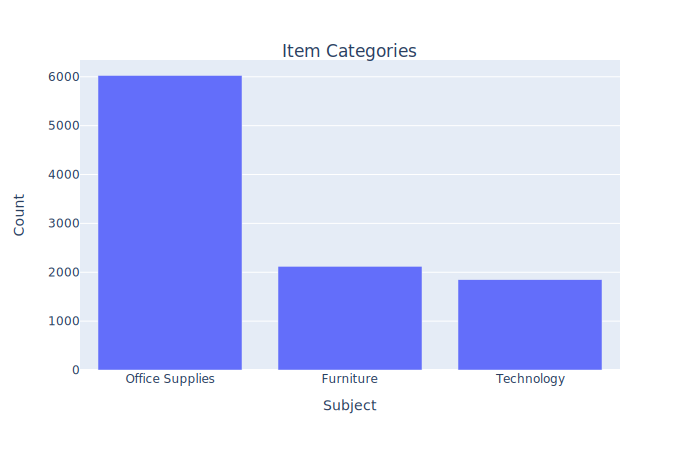

In [10]:
a = data['category'].value_counts()
fig = px.bar(a, x=a.index, y=a.values, height=400)
fig.update_layout( title={
        'text': "Item Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Count")
fig.show(renderer='svg')

### Separating data by the category (Furniture, Technology, Office Supplies)

In [11]:
df_furniture=data.loc[data['category'] == 'Furniture']
df_technology=data.loc[data['category'] == 'Technology']
df_office=data.loc[data['category'] == 'Office Supplies']

In [12]:
#Aggregating sales by order date
furniture= df_furniture.groupby('order_date')['sales'].sum().reset_index()
technology= df_technology.groupby('order_date')['sales'].sum().reset_index()
office= df_office.groupby('order_date')['sales'].sum().reset_index()

In [13]:
#Set index 
furniture = furniture.set_index('order_date')
technology = technology.set_index('order_date')
office = office.set_index('order_date')

#set index for original datasets
df_furniture = df_furniture.set_index('order_date')
df_technology = df_technology.set_index('order_date')
df_office = df_office.set_index('order_date')

In [14]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='order_date', length=889, freq=None)

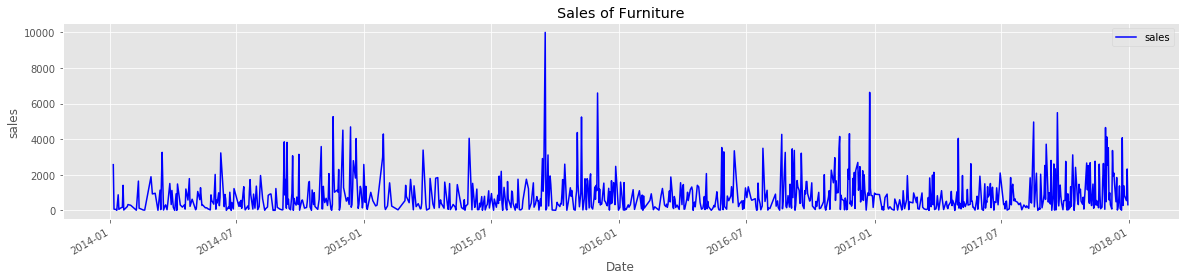

In [15]:
furniture_sales = furniture[['sales']]
furniture_sales.plot(color='blue',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Furniture")
plt.show()

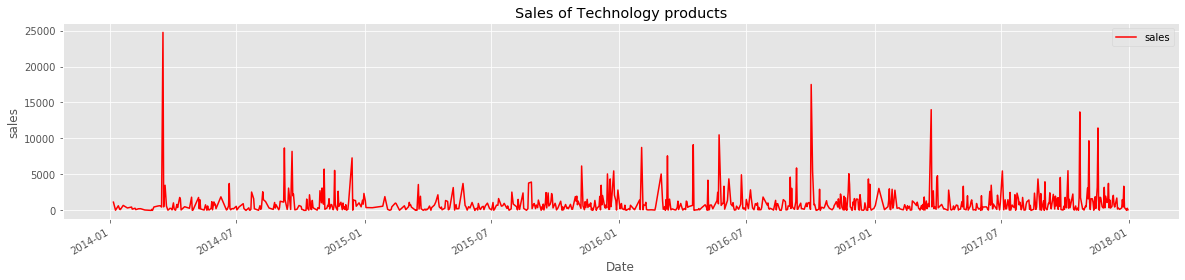

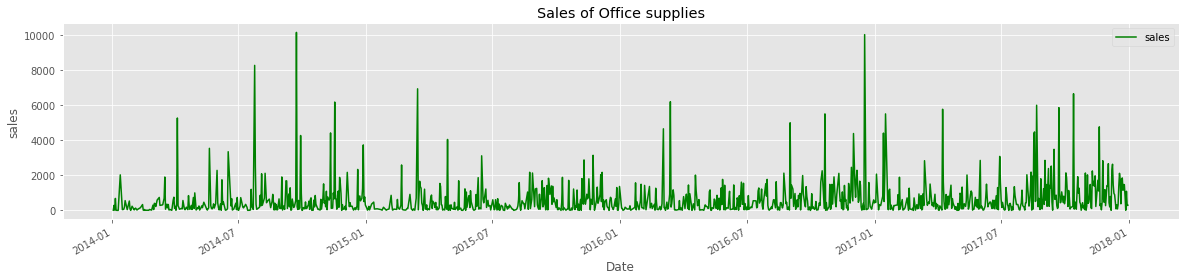

In [16]:
technology_sales = technology[['sales']]
ax= technology_sales.plot(color='r',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Technology products")
plt.show()

office_sales = office[['sales']]
ax= office_sales.plot(color='green',figsize=(20,4))
ax.set_xlabel("Date")
ax.set_ylabel('sales')
ax.set_title("Sales of Office supplies")
plt.show()

In [17]:
# Using averages daily sales value - set start of the month as index
avg_furniture_sales = furniture_sales['sales'].resample('MS').mean()
avg_technology_sales = technology_sales['sales'].resample('MS').mean()
avg_office_sales = office_sales['sales'].resample('MS').mean()

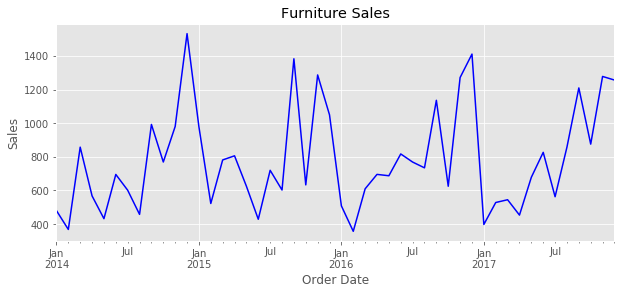

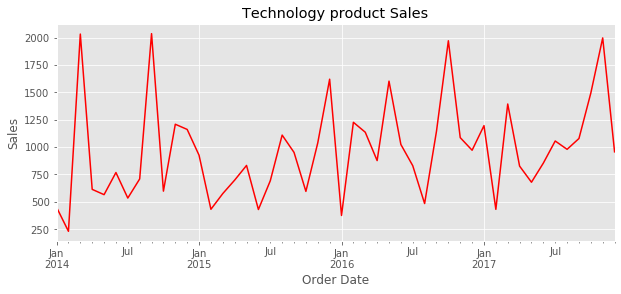

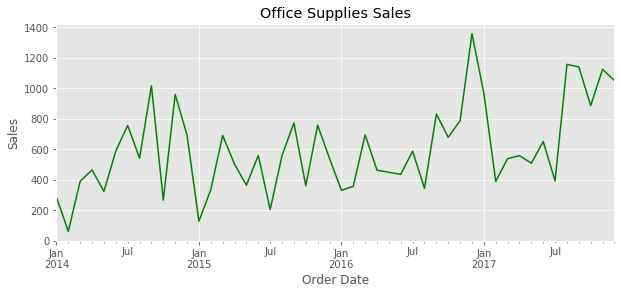

In [18]:
avg_furniture_sales.plot(figsize=(10, 4),color='blue')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Furniture Sales")
plt.show()

avg_technology_sales.plot(figsize=(10, 4),color='red')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Technology product Sales")
plt.show()

avg_office_sales.plot(figsize=(10, 4),color='green')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Office Supplies Sales")
plt.show()

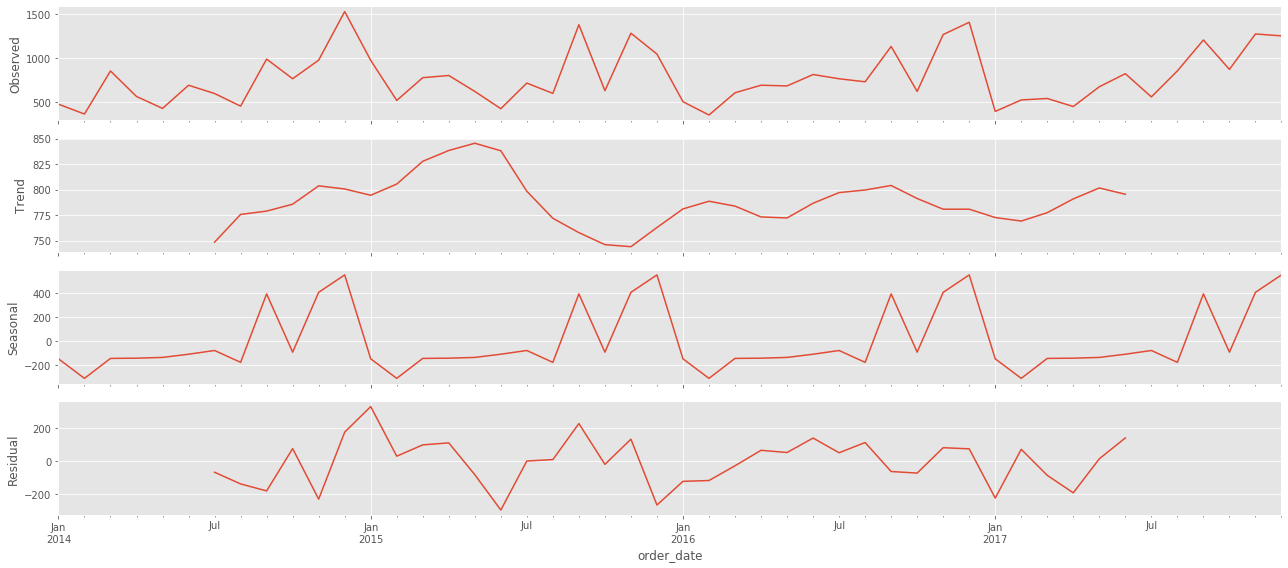

In [19]:
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(avg_furniture_sales, model='additive')
fig = decomposition.plot()
plt.show()

### Plot the map of states based on the amount of sales

In [20]:
states_profit = df_furniture.groupby('state').sum()['sales']
states_profit_df = pd.DataFrame(data=states_profit,columns=['sales']).reset_index()

In [21]:
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
    'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL',
    'Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA',
    'Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
    'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE',
    'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC',
    'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI',
    'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

In [22]:
list_abv = []
for state in states_profit_df['state']:
    list_abv.append(us_state_abbrev[state])

In [23]:
states_profit_df['code']=list_abv

In [24]:
#Set up everything so that the figures show up in the notebook
init_notebook_mode(connected=True) 

In [25]:
state_data = dict(type='choropleth',
            colorscale = 'RdBu',
            locations = states_profit_df['code'],
            z = np.round(states_profit_df['sales'],2),
            locationmode = 'USA-states',
            text = states_profit_df['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"USD"}
            ) 

In [26]:
layout = dict(title='Map of the States based on the amount of sales',geo = {'scope':'usa'})

In [27]:
choromap = go.Figure(data = [state_data],layout = layout)

In [28]:
iplot(choromap)

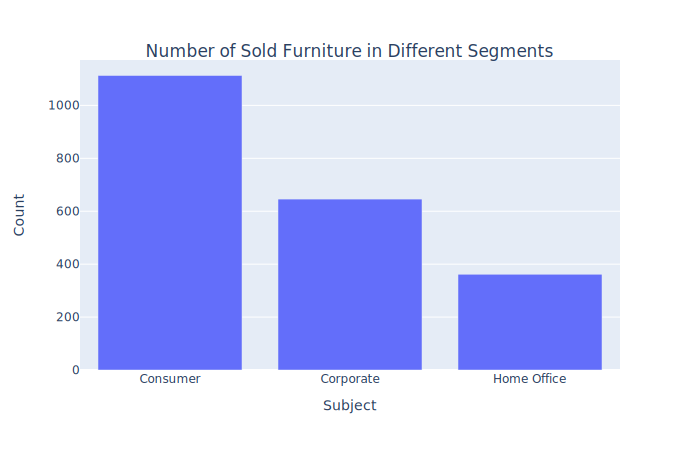

In [29]:
b = df_furniture['segment'].value_counts()
fig = px.bar(b, x=b.index, y=b.values, height=400)
fig.update_layout( title={
        'text': "Number of Sold Furniture in Different Segments",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Count")
fig.show(renderer='svg')

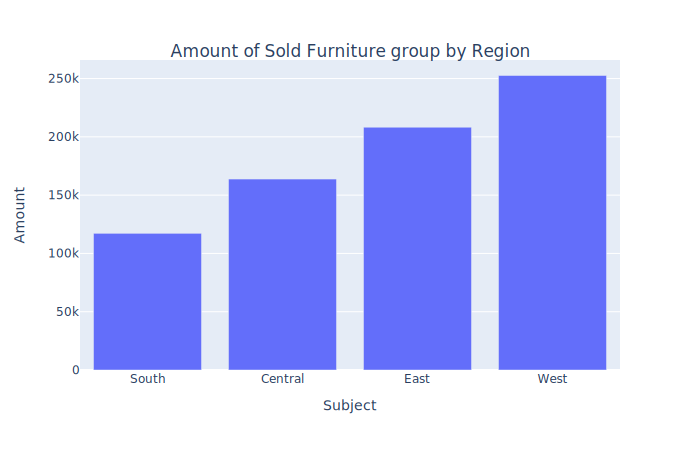

In [30]:
c = df_furniture.groupby('region')['sales'].sum().sort_values()
fig = px.bar(c, x=c.index, y=c.values, height=400)
fig.update_layout( title={
        'text': "Amount of Sold Furniture group by Region",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Amount")
fig.show(renderer='svg')

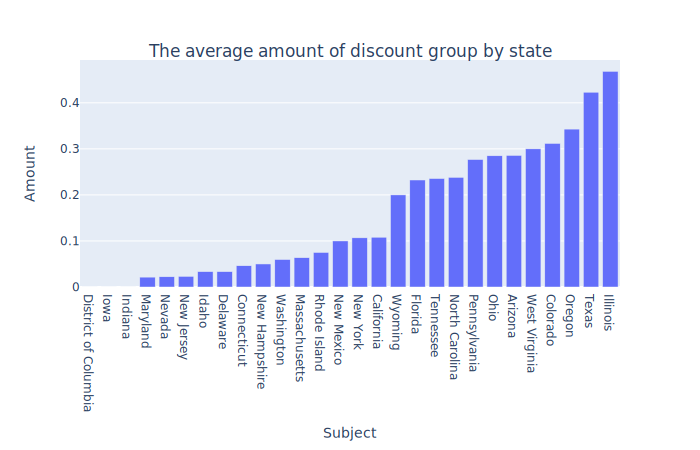

In [31]:
d = df_furniture.groupby('state')['discount'].mean().sort_values()[-28:]
fig = px.bar(d, x=d.index, y=d.values, height=400)
fig.update_layout( title={
        'text': "The average amount of discount group by state",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Amount")
fig.show(renderer='svg')

The graph below shows the number of sales group by region separated by category. In all of the regions products in office supplies category were the bes seller and products in the furniture category sold less than others.

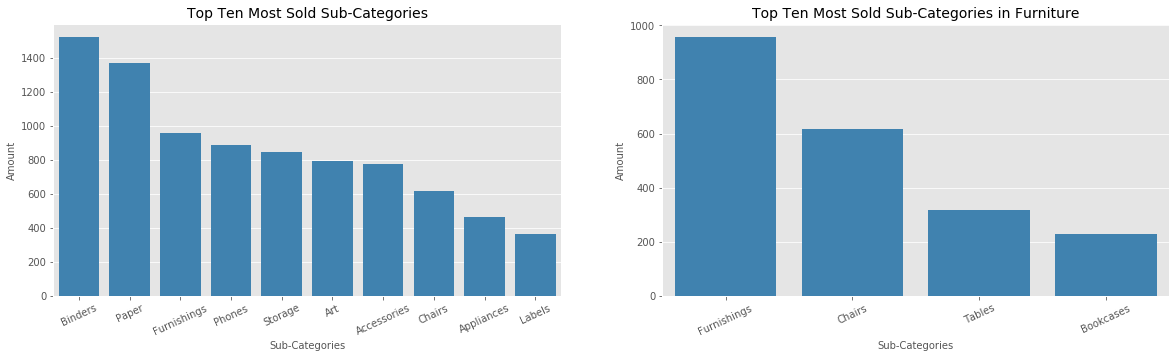

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=data['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           y=data['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories',size=14)
plt.xticks(rotation='25')
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Amount',size=10)

plt.subplot(1,2,2)
sns.barplot(x=df_furniture['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           y=df_furniture['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories in Furniture',size=14)
plt.xticks(rotation='25')
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Amount',size=10)

plt.show()

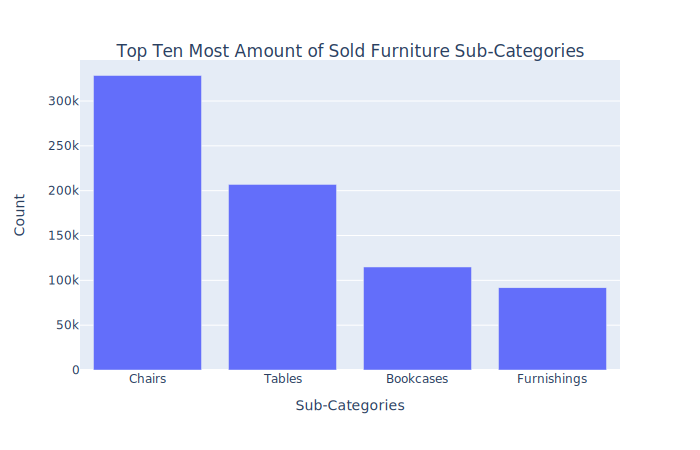

In [33]:
f = df_furniture.groupby('sub_category')['sales'].sum().sort_values(ascending=False)
fig = px.bar(f, x=f.index, y=f.values, height=400)
fig.update_layout( title={
        'text': "Top Ten Most Amount of Sold Furniture Sub-Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Sub-Categories",
    yaxis_title="Count")
fig.show(renderer='svg')

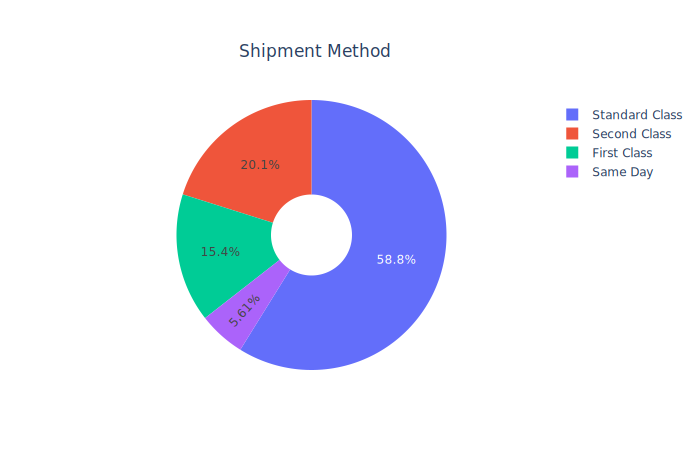

In [34]:
g= df_furniture['ship_mode'].value_counts()

labels = g.index
values = g.values


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout( title={
        'text': "Shipment Method",
        'y':0.9,'x':0.45,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='svg')

In [35]:
#total quantity of products on this file
data['quantity'].sum()

37873

In [36]:
#Quantity grouped by region
data.groupby(['region'])['quantity'].sum()

region
Central     8780
East       10618
South       6209
West       12266
Name: quantity, dtype: int64

The bellow heat map graph, indicate the positive and negative correlation between variables.
There is a negative correlation between discount and profit. 

(6.0, 0.0)

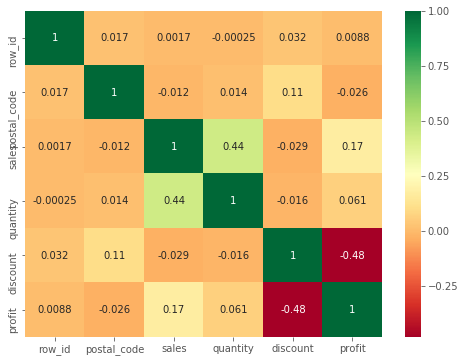

In [37]:
df_corr = df_furniture.corr()
plt.figure(figsize=(8,6))
ax = sns.heatmap(df_corr, annot=True,cmap='RdYlGn') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Data Preprossesing

In [38]:
df_furniture.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [39]:
# We don't need row_id, order_id,customer information
# Also we don't need the country and category column (there is only one value for them)

df_furniture=df_furniture.drop('row_id',axis=1)
df_furniture=df_furniture.drop('order_id',axis=1)
df_furniture=df_furniture.drop('customer_id',axis=1)
df_furniture=df_furniture.drop('customer_name',axis=1)
df_furniture=df_furniture.drop('country',axis=1)
df_furniture=df_furniture.drop('category',axis=1)
df_furniture=df_furniture.drop('product_id',axis=1)
df_furniture=df_furniture.drop('product_name',axis=1)

In [40]:
# We are going to use order date and not ship date
df_furniture=df_furniture.drop('ship_date',axis=1)

In [41]:
#Convert the ship_mode into dummy variables
dummies = pd.get_dummies(df_furniture['ship_mode'],drop_first=True)
df_furniture= pd.concat( [df_furniture.drop('ship_mode',axis=1),dummies],axis=1)

In [42]:
#Convert the segment into dummy variables
dummies2 = pd.get_dummies(df_furniture['segment'],drop_first=True)
df_furniture= pd.concat( [df_furniture.drop('segment',axis=1),dummies2],axis=1)

In [43]:
#Convert the region into dummy variables
dummies3 = pd.get_dummies(df_furniture['region'],drop_first=True)
df_furniture= pd.concat( [df_furniture.drop('region',axis=1),dummies3],axis=1)

In [44]:
# Too many unique job city to convert it to dummy variables. So we remove the city column.
print(len(set(df_furniture['city'])))
# We are going to use order date and not ship date
df_furniture=df_furniture.drop('city',axis=1)

371


In [45]:
#Convert the sub_category into dummy variables
dummies4 = pd.get_dummies(df_furniture['sub_category'],drop_first=True)
df_furniture= pd.concat( [df_furniture.drop('sub_category',axis=1),dummies4],axis=1)

In [46]:
# Too many unique city to convert it to dummy variables. So we remove the city column.
print(len(set(df_furniture['postal_code'])))
# We are going to use order date and not ship date
df_furniture=df_furniture.drop('postal_code',axis=1)

454


In [47]:
# Too many unique state to convert it to dummy variables. So we remove the city column.
print(len(set(df_furniture['state'])))
# We are going to use order date and not ship date
df_furniture=df_furniture.drop('state',axis=1)

48


In [48]:
df_furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      2121 non-null   datetime64[ns]
 1   sales           2121 non-null   float64       
 2   quantity        2121 non-null   int64         
 3   discount        2121 non-null   float64       
 4   profit          2121 non-null   float64       
 5   Same Day        2121 non-null   uint8         
 6   Second Class    2121 non-null   uint8         
 7   Standard Class  2121 non-null   uint8         
 8   Corporate       2121 non-null   uint8         
 9   Home Office     2121 non-null   uint8         
 10  East            2121 non-null   uint8         
 11  South           2121 non-null   uint8         
 12  West            2121 non-null   uint8         
 13  Chairs          2121 non-null   uint8         
 14  Furnishings     2121 non-null   uint8         
 15  Tabl

In [49]:
df_furniture = df_furniture.sort_values('order_date').set_index('order_date')
df_furniture.head()

,sales,quantity,discount,profit,Same Day,Second Class,Standard Class,Corporate,Home Office,East,South,West,Chairs,Furnishings,Tables
order_date,,,,,,,,,,,,,,,
2014-01-06,2573.820,9,0.0,746.4078,0,0,1,0,1,0,1,0,1,0,0
2014-01-07,76.728,3,0.6,-53.7096,0,0,1,0,0,0,0,0,0,1,0
2014-01-10,51.940,1,0.0,21.2954,0,0,1,1,0,0,1,0,0,1,0
2014-01-11,9.940,2,0.0,3.0814,0,0,0,0,0,1,0,0,0,1,0
2014-01-13,545.940,6,0.0,87.3504,0,1,0,0,0,0,1,0,1,0,0
